# ML model to predict Employee Attriation

In [1]:
# Checking python version
from platform import python_version
print(python_version())

3.6.8


### Import required libraries

In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

import matplotlib.pyplot as plt



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 1. Read and Explore the data

In [4]:
df = pd.read_csv("Employee Attrition.csv")

In [5]:
# shape of the data frame
print ("The shape of dataframe is :",df.shape)


The shape of dataframe is : (1470, 34)


In [6]:
df.head()

,EmployeeNumber,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,...,Low,80,0,8,0,Bad,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,...,Very High,80,1,10,3,Better,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,...,Medium,80,0,7,3,Better,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,...,High,80,0,8,3,Better,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,...,Very High,80,1,6,3,Better,2,2,2,2


In [7]:
# checking datatypes
print("The datatypes of the coloums :\n",df.dtypes)


The datatypes of the coloums :
 EmployeeNumber               int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                   int64
JobInvolvement              object
JobLevel                     int64
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating           object
RelationshipSatisfaction    object
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears      

In [8]:
# column names of data frame
col_names = list(df.columns)
col_names

['EmployeeNumber',
 'Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [9]:
# Check for null values
df.isnull().sum()

EmployeeNumber              0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [10]:
# description of the data
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
EmployeeNumber,1470,NaN,NaN,NaN,735.5,424.497,1,368.25,735.5,1102.75,1470
Age,1470,NaN,NaN,NaN,36.9238,9.13537,18,30,36,43,60
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470,NaN,NaN,NaN,802.486,403.509,102,465,802,1157,1499
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470,NaN,NaN,NaN,9.19252,8.10686,1,2,7,14,29
Education,1470,5,Bachelor,572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,1470,4,High,453,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Number of unique values of each column

In [11]:
for i in df.columns:
    print ("Number of unique value in {} column are {} \n The unique values are{} :".format(i,len(df[i].unique()),df[i].unique()))
    print("\n____________________________________\n")


Number of unique value in EmployeeNumber column are 1470 
 The unique values are[   1    2    3 ... 1468 1469 1470] :

____________________________________

Number of unique value in Age column are 43 
 The unique values are[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60] :

____________________________________

Number of unique value in Attrition column are 2 
 The unique values are['Yes' 'No'] :

____________________________________

Number of unique value in BusinessTravel column are 3 
 The unique values are['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] :

____________________________________

Number of unique value in DailyRate column are 886 
 The unique values are[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 

In [12]:
# categorical columns
cat_col = []
for i in col_names:
    if df[i].dtype =='object':
        cat_col.append(i)
    

In [13]:
cat_col

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'WorkLifeBalance']

In [14]:
df.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [15]:
# convert ordinal columns to integers 
df.Attrition = df.Attrition.replace(to_replace=[0,1],value=['No','Yes'])

In [16]:
df.Education.unique()

array(['College', 'Below College', 'Master', 'Bachelor', 'Doctor'],
      dtype=object)

In [17]:
# convert ordinal columns to integers 
df.Education = df.Education.replace(to_replace=[1,2,3,4,5],value=['Below College','College','Bachelor','Master', 'Doctor'])

In [18]:
df.EnvironmentSatisfaction.unique()

array(['Medium', 'High', 'Very High', 'Low'], dtype=object)

In [19]:
# convert ordinal columns to integers 
df.EnvironmentSatisfaction = df.EnvironmentSatisfaction.replace(to_replace=[1,2,3,4],value=['Low','Medium', 'High', 'Very High' ])

In [20]:
df.JobInvolvement.unique()

array(['High', 'Medium', 'Very High', 'Low'], dtype=object)

In [21]:
# convert ordinal columns to integers 
df.JobInvolvement = df.JobInvolvement.replace(to_replace=[1,2,3,4],value=['Low','Medium', 'High', 'Very High' ])

In [22]:
df.JobSatisfaction.unique()

array(['Very High', 'Medium', 'High', 'Low'], dtype=object)

In [23]:
# convert ordinal columns to integers 
df.JobSatisfaction = df.JobSatisfaction.replace(to_replace=[1,2,3,4],value=['Low','Medium', 'High', 'Very High' ])

In [24]:
df.PerformanceRating.unique()

array(['Excellent', 'Outstanding'], dtype=object)

In [25]:
# convert ordinal columns to integers 
df.PerformanceRating = df.PerformanceRating.replace(to_replace=[3,4],value=['Excellent', 'Outstanding'])

In [26]:
df.RelationshipSatisfaction.unique()

array(['Low', 'Very High', 'Medium', 'High'], dtype=object)

In [27]:
# convert ordinal columns to integers 
df.RelationshipSatisfaction = df.RelationshipSatisfaction.replace(to_replace=[1,2,3,4],value=['Low','Medium', 'High', 'Very High' ])

In [28]:
df.WorkLifeBalance.unique()

array(['Bad', 'Better', 'Good', 'Best'], dtype=object)

In [29]:
# convert ordinal columns to integers 
df.WorkLifeBalance = df.WorkLifeBalance.replace(to_replace=[1,2,3,4],value=['Bad', 'Good','Better',  'Best'])

## Convert all categorical values to labels if there are less than 15 unique values

In [30]:
cat_cols=[]
for i in df.columns:
    if df[i].dtype == 'object' or len(df[i].unique())<=15:
        cat_cols.append(i)
        print ("{} : {} : {}".format(i,len(df[i].unique()),df[i].unique()))

Attrition : 2 : ['Yes' 'No']
BusinessTravel : 3 : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : 3 : ['Sales' 'Research & Development' 'Human Resources']
Education : 5 : ['College' 'Below College' 'Master' 'Bachelor' 'Doctor']
EducationField : 6 : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EnvironmentSatisfaction : 4 : ['Medium' 'High' 'Very High' 'Low']
Gender : 2 : ['Female' 'Male']
JobInvolvement : 4 : ['High' 'Medium' 'Very High' 'Low']
JobLevel : 5 : [2 1 3 4 5]
JobRole : 9 : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
JobSatisfaction : 4 : ['Very High' 'Medium' 'High' 'Low']
MaritalStatus : 3 : ['Single' 'Married' 'Divorced']
NumCompaniesWorked : 10 : [8 1 6 9 0 4 5 2 7 3]
Over18 : 1 : ['Y']
OverTime : 2 : ['Yes' 'No']
PercentSalaryHike : 15 : [11 23 15 12 13 20 22 21 17 14 16

In [31]:
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

In [32]:
df[cat_cols].dtypes

Attrition                   object
BusinessTravel              object
Department                  object
Education                   object
EducationField              object
EnvironmentSatisfaction     object
Gender                      object
JobInvolvement              object
JobLevel                     int64
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating           object
RelationshipSatisfaction    object
StandardHours                int64
StockOptionLevel             int64
TrainingTimesLastYear        int64
WorkLifeBalance             object
dtype: object

## convert all columns in cat_cols to categorical datatype

In [33]:
for i in cat_cols:
    df[i]=df[i].astype("category")

In [34]:
df[cat_cols].dtypes

Attrition                   category
BusinessTravel              category
Department                  category
Education                   category
EducationField              category
EnvironmentSatisfaction     category
Gender                      category
JobInvolvement              category
JobLevel                    category
JobRole                     category
JobSatisfaction             category
MaritalStatus               category
NumCompaniesWorked          category
Over18                      category
OverTime                    category
PercentSalaryHike           category
PerformanceRating           category
RelationshipSatisfaction    category
StandardHours               category
StockOptionLevel            category
TrainingTimesLastYear       category
WorkLifeBalance             category
dtype: object

## Summary of categorical columns

In [35]:
df.describe(include="category").transpose()

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
Education,1470,5,Bachelor,572
EducationField,1470,6,Life Sciences,606
EnvironmentSatisfaction,1470,4,High,453
Gender,1470,2,Male,882
JobInvolvement,1470,4,High,868
JobLevel,1470,5,1,543
JobRole,1470,9,Sales Executive,326


In [36]:
num_cols = [i for i in df.columns if i not in cat_cols]
num_cols

['EmployeeNumber',
 'Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

# Data Visualization

In [37]:
import seaborn as sns

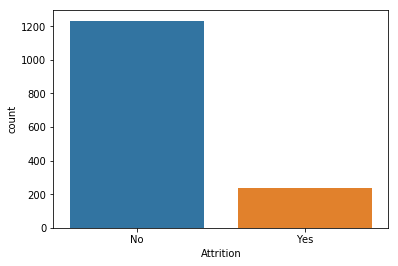

In [38]:
sns.countplot(df.Attrition)

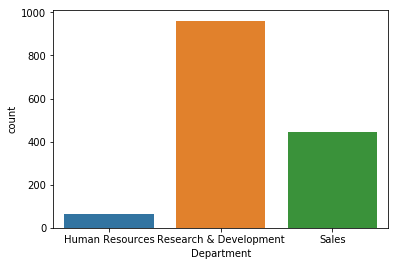

In [39]:
sns.countplot(df.Department)

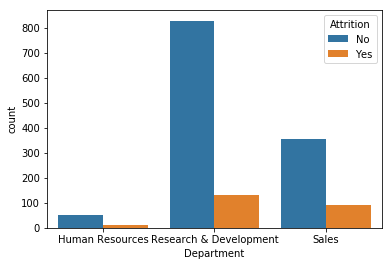

In [40]:
sns.countplot(x='Department',hue='Attrition',data=df)

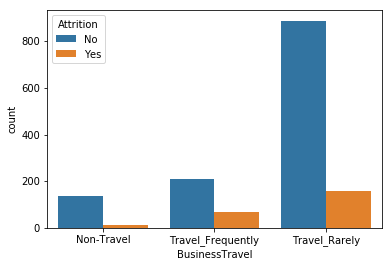

In [41]:
sns.countplot(x='BusinessTravel',hue='Attrition',data=df)

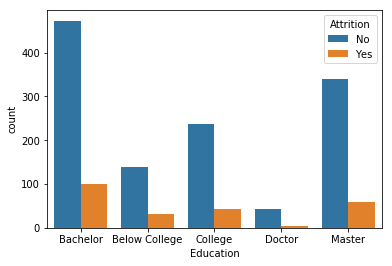

In [42]:
sns.countplot(x='Education',hue='Attrition',data=df)

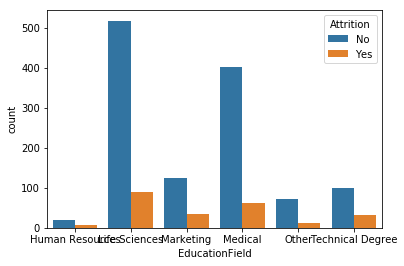

In [43]:
sns.countplot(x='EducationField',hue='Attrition',data=df)

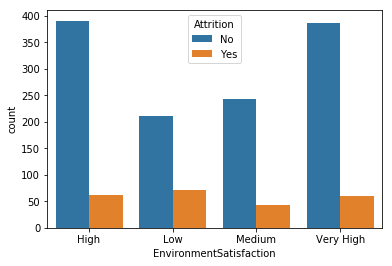

In [44]:
sns.countplot(x='EnvironmentSatisfaction',hue='Attrition',data=df)

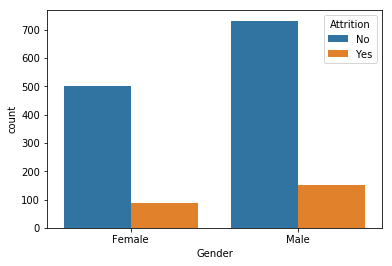

In [45]:
sns.countplot(x='Gender',hue='Attrition',data=df)

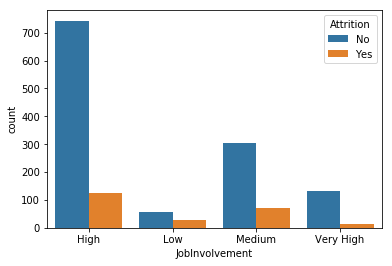

In [46]:
sns.countplot(x='JobInvolvement',hue='Attrition',data=df)

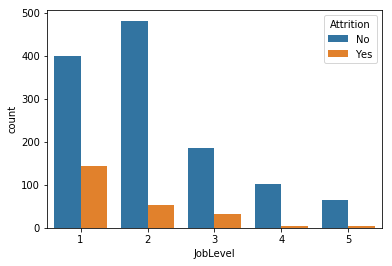

In [47]:
sns.countplot(x='JobLevel',hue='Attrition',data=df)

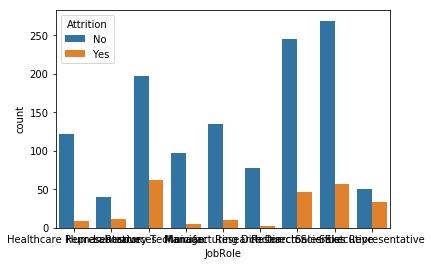

In [48]:
sns.countplot(x='JobRole',hue='Attrition',data=df)

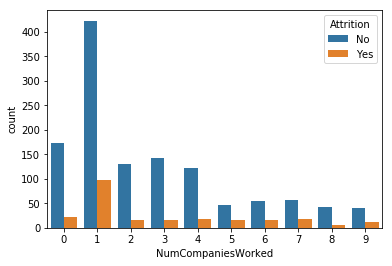

In [49]:
sns.countplot(x='NumCompaniesWorked',hue='Attrition',data=df)

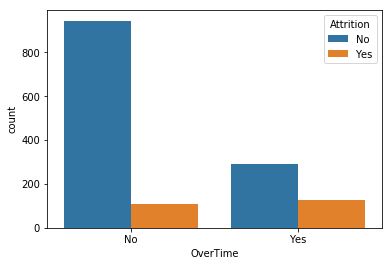

In [50]:
sns.countplot(x='OverTime',hue='Attrition',data=df)

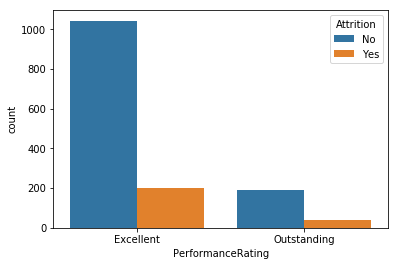

In [51]:
sns.countplot(x='PerformanceRating',hue='Attrition',data=df)

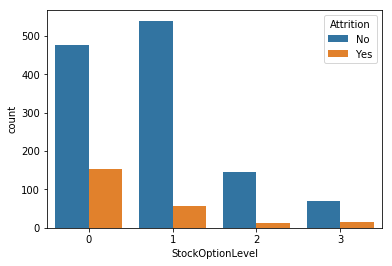

In [52]:
sns.countplot(x='StockOptionLevel',hue='Attrition',data=df)

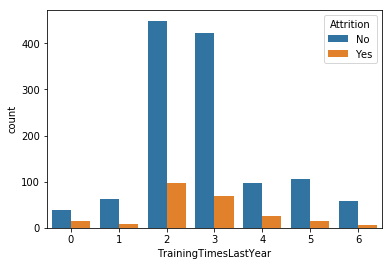

In [53]:
sns.countplot(x='TrainingTimesLastYear',hue='Attrition',data=df)

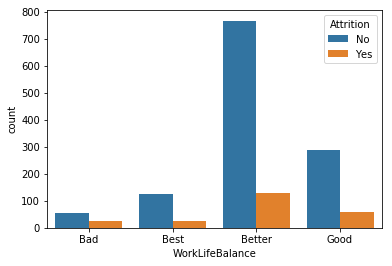

In [54]:
sns.countplot(x='WorkLifeBalance',hue='Attrition',data=df)

# Building Prediction model


In [55]:
df.head()

,EmployeeNumber,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,...,Low,80,0,8,0,Bad,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,...,Very High,80,1,10,3,Better,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,...,Medium,80,0,7,3,Better,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,...,High,80,0,8,3,Better,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,...,Very High,80,1,6,3,Better,2,2,2,2


In [56]:
df.shape

(1470, 34)

## Lable Encoding



In [57]:
from sklearn.preprocessing import LabelEncoder

df_lb_encd = df.select_dtypes(exclude=['number']) \
                .apply(LabelEncoder().fit_transform) \
                .join(df.select_dtypes(include=['number']))

### Target 

In [58]:
y=df_lb_encd['Attrition']

In [59]:
y.shape

(1470,)

### Predictors

In [60]:
X = df_lb_encd.drop(columns="Attrition")

In [61]:
X.shape

(1470, 33)

### Split data into train and test

In [62]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1234)

In [63]:
# Shape of train and test
print("train shape {} \n test shape  {}".format(X_train.shape,X_test.shape))

train shape (1029, 33) 
 test shape  (441, 33)


In [64]:
type(y_train)

pandas.core.series.Series

In [65]:
type(X_train)

pandas.core.frame.DataFrame

# Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

### Training the model

In [67]:
log_reg.fit(X_train,y_train)

C:\Users\dhruva\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Predict on first 10 test values

In [68]:
log_reg.predict(X_test[0:10])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [69]:
y_test[0:10]

520     0
286     1
347     0
1245    0
1153    1
338     0
1430    0
1438    1
466     0
536     0
Name: Attrition, dtype: int32

### Predict on test data

In [70]:
predict_log_reg = log_reg.predict(X_test)

In [71]:
score = log_reg.score(X_test,y_test)
score

0.8526077097505669

In [72]:
pec = (df.Attrition.value_counts()['No']/df.Attrition.value_counts().sum())
print("Percentage of No churn in data ={}%".format(np.round((pec*100),2)))

Percentage of No churn in data =83.88%


## Confusion Matrix

In [73]:
from sklearn import metrics

In [74]:
log_reg_cm = metrics.confusion_matrix(y_test,predict_log_reg,)
log_reg_cm

array([[361,  10],
       [ 55,  15]], dtype=int64)

In [75]:
print("Accuracy =" ,metrics.accuracy_score(y_true=y_test,y_pred=predict_log_reg))
print("Recall =" ,metrics.recall_score(y_true=y_test,y_pred=predict_log_reg))
print("Precission =", metrics.precision_score(y_true=y_test,y_pred=predict_log_reg))

Accuracy = 0.8526077097505669
Recall = 0.21428571428571427
Precission = 0.6


In [76]:
print("Attriation = '1'")
y_test.value_counts()

Attriation = '1'


0    371
1     70
Name: Attrition, dtype: int64

# Decision Tree


In [77]:
# import libaries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [78]:
# train Decision tree
dt_clf = tree.DecisionTreeClassifier()
dt_clf= dt_clf.fit(X_train,y_train)

In [79]:
dt_clf.predict(X_test[0:10])

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [80]:
y_test[0:10]

520     0
286     1
347     0
1245    0
1153    1
338     0
1430    0
1438    1
466     0
536     0
Name: Attrition, dtype: int32

### prediction on test data by decision tree

In [81]:
# predicting on test data
dt_clf_test_pdt = dt_clf.predict(X_test)

## Confusion matrix

In [82]:
from sklearn import metrics
dt_clf_CM = metrics.confusion_matrix(y_true=y_test,y_pred=dt_clf_test_pdt)
print ("Confusion matrix of DT")
dt_clf_CM

Confusion matrix of DT


array([[330,  41],
       [ 45,  25]], dtype=int64)

In [83]:
# Accuracy
dt_clf.score(X=X_test,y=y_test)

0.8049886621315193

In [84]:
print("Accuracy =" ,metrics.accuracy_score(y_true=y_test,y_pred=dt_clf_test_pdt))
print("Recall =" ,metrics.recall_score(y_true=y_test,y_pred=dt_clf_test_pdt))
print("Precission =", metrics.precision_score(y_true=y_test,y_pred=dt_clf_test_pdt))

Accuracy = 0.8049886621315193
Recall = 0.35714285714285715
Precission = 0.3787878787878788


# Simple Decision tree with depth =3

In [85]:
dt_clf_gini = DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=3,min_samples_leaf=5)

In [86]:
dt_clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [87]:
dt_clf_gini.score(X=X_test,y=y_test)

0.8503401360544217

In [88]:
# prediction on test data
dt_clf_gini_test_pdt = dt_clf_gini.predict(X=X_test)

In [89]:
from sklearn import metrics
dt_clf_gini_CM = metrics.confusion_matrix(y_true=y_test,y_pred=dt_clf_gini_test_pdt)
print ("Confusion matrix of DT")
dt_clf_gini_CM

Confusion matrix of DT


array([[361,  10],
       [ 56,  14]], dtype=int64)

In [90]:
print("Accuracy =" ,metrics.accuracy_score(y_true=y_test,y_pred=dt_clf_gini_test_pdt))
print("Recall =" ,metrics.recall_score(y_true=y_test,y_pred=dt_clf_gini_test_pdt))
print("Precission =", metrics.precision_score(y_true=y_test,y_pred=dt_clf_gini_test_pdt))

Accuracy = 0.8503401360544217
Recall = 0.2
Precission = 0.5833333333333334


# create DT

In [91]:
feature_list = list(X_train.columns)

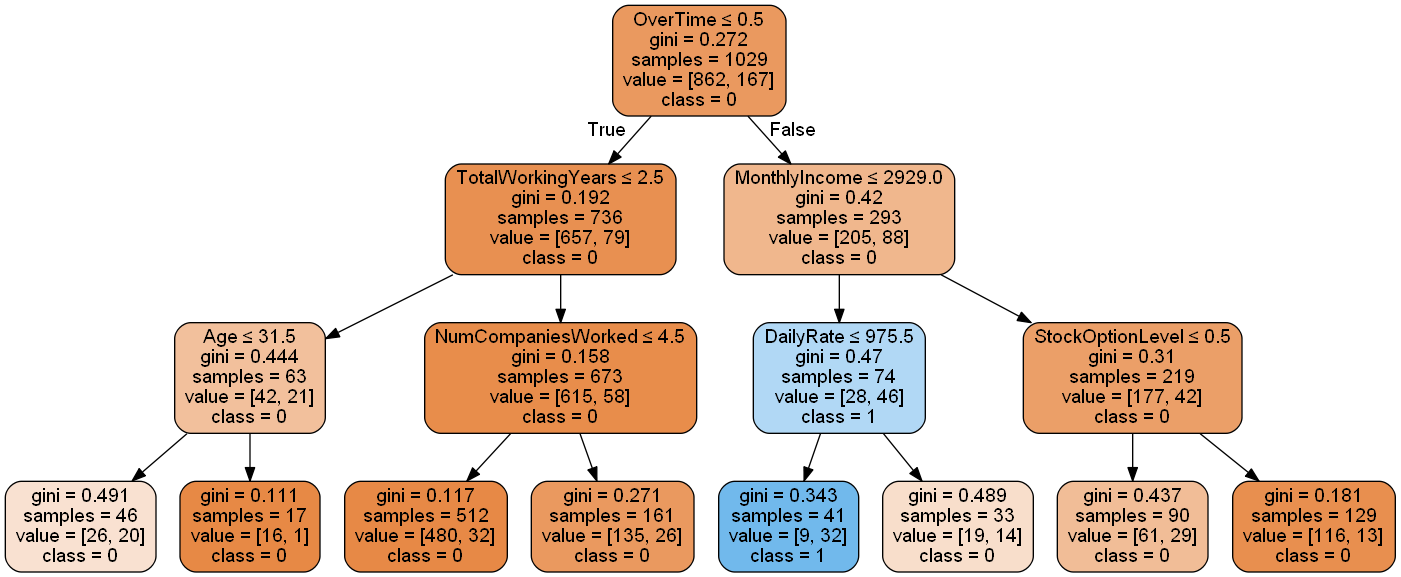

In [92]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt_clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_list,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('churn_depth_3.png')
Image(graph.create_png())

# The blue colour repressents employee Attirition

## in short
if OverTime>=0.5:
    if MonthlyIncome<=2929.0:
        if DailyRate<=975.5:
        print("Employe is more likely to Quit")
        else:
        print ("Employee continues")



# Decision tree of depth = 5

In [93]:
# Decision tree with a depth of 5
dt_clf_gini_5 = DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=5,min_samples_leaf=5)

# train the model
dt_clf_gini_5.fit(X_train,y_train)

# prediction on test data
dt_clf_gini_5_test_pdt = dt_clf_gini_5.predict(X=X_test)


from sklearn import metrics
dt_clf_gini_5_CM = metrics.confusion_matrix(y_true=y_test,y_pred=dt_clf_gini_5_test_pdt)
print ("Confusion matrix of DT")
dt_clf_gini_5_CM

print("Accuracy =" ,metrics.accuracy_score(y_true=y_test,y_pred=dt_clf_gini_5_test_pdt))
print("Recall =" ,metrics.recall_score(y_true=y_test,y_pred=dt_clf_gini_5_test_pdt))
print("Precission =", metrics.precision_score(y_true=y_test,y_pred=dt_clf_gini_5_test_pdt))


Confusion matrix of DT
Accuracy = 0.8526077097505669
Recall = 0.24285714285714285
Precission = 0.5862068965517241


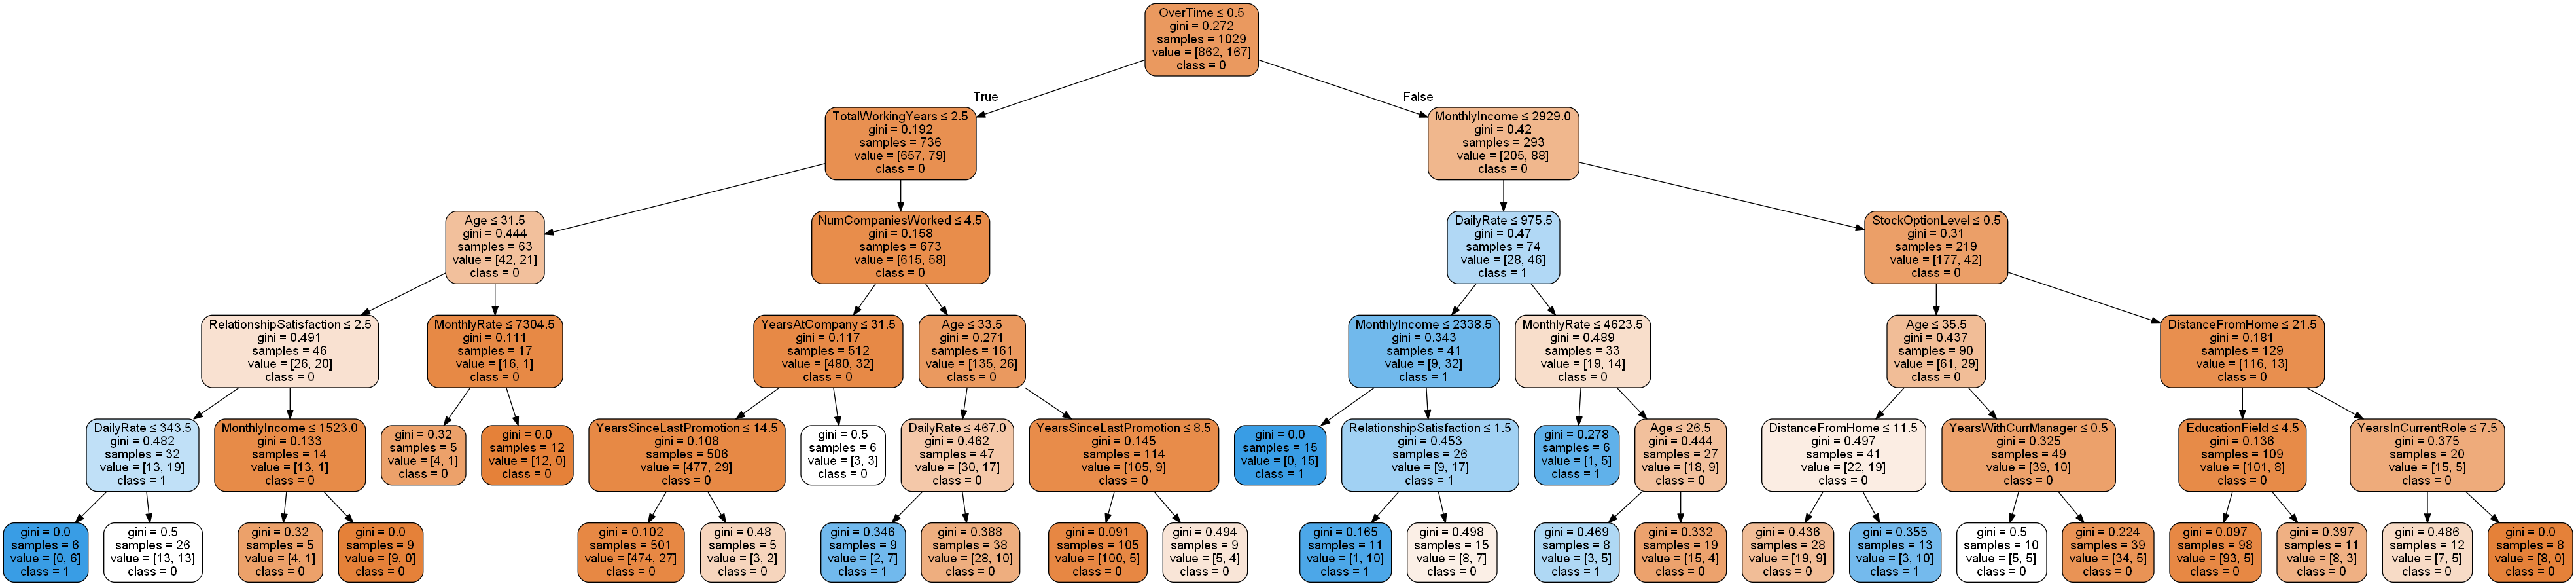

In [94]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt_clf_gini_5, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_list,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('churn_depth_5.png')
Image(graph.create_png())

# Random Forest

In [95]:
# import libraries
from sklearn.ensemble import RandomForestClassifier

In [96]:
#build and train model
rf_1000 = RandomForestClassifier(n_estimators = 1000, random_state = 123)
rf_1000.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [97]:
rf_1000_pred = rf_1000.predict(X_test)

In [98]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
rf_1000_cm = confusion_matrix(y_test, rf_1000_pred)
rf_1000_cm

array([[370,   1],
       [ 61,   9]], dtype=int64)

In [99]:

print("Accuracy =" ,metrics.accuracy_score(y_true=y_test,y_pred=rf_1000_pred))
print("Recall =" ,metrics.recall_score(y_true=y_test,y_pred=rf_1000_pred))
print("Precission =", metrics.precision_score(y_true=y_test,y_pred=rf_1000_pred))


Accuracy = 0.8594104308390023
Recall = 0.12857142857142856
Precission = 0.9


In [100]:
#build and train model for 100 trees
rf_100 = RandomForestClassifier(n_estimators = 100, random_state = 123)
rf_100.fit(X_train,y_train)

# predict on test data
rf_100_pred = rf_100.predict(X_test)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
rf_100_cm = confusion_matrix(y_test, rf_100_pred)
print(rf_100_cm)


print("Accuracy =" ,metrics.accuracy_score(y_true=y_test,y_pred=rf_100_pred))
print("Recall =" ,metrics.recall_score(y_true=y_test,y_pred=rf_100_pred))
print("Precission =", metrics.precision_score(y_true=y_test,y_pred=rf_100_pred))


[[370   1]
 [ 60  10]]
Accuracy = 0.8616780045351474
Recall = 0.14285714285714285
Precission = 0.9090909090909091


In [101]:
#build and train model for 10,000 trees
rf_10000 = RandomForestClassifier(n_estimators = 10000, random_state = 123)
rf_10000.fit(X_train,y_train)

# predict on test data
rf_10000_pred = rf_10000.predict(X_test)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
rf_10000_cm = confusion_matrix(y_test, rf_10000_pred)
print(rf_10000_cm)


print("Accuracy =" ,metrics.accuracy_score(y_true=y_test,y_pred=rf_10000_pred))
print("Recall =" ,metrics.recall_score(y_true=y_test,y_pred=rf_10000_pred))
print("Precission =", metrics.precision_score(y_true=y_test,y_pred=rf_10000_pred))


[[370   1]
 [ 61   9]]
Accuracy = 0.8594104308390023
Recall = 0.12857142857142856
Precission = 0.9
